In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/ML2022-1/PROYECTO-DNA

/content/drive/MyDrive/ML2022-1/PROYECTO-DNA


In [3]:
import pip
import sys
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, mean_squared_error,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,RocCurveDisplay
from imblearn.over_sampling import SMOTE, ADASYN

In [4]:
dataset = pd.read_csv('codon_usage.csv')
dataset

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13023,pri,0,9601,1097,Pongo pygmaeus abelii,0.02552,0.03555,0.00547,0.01367,0.01276,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
13024,pri,1,9601,2067,mitochondrion Pongo pygmaeus abelii,0.01258,0.03193,0.01984,0.00629,0.01451,...,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
13025,pri,1,9602,1686,mitochondrion Pongo pygmaeus pygmaeus,0.01423,0.03321,0.01661,0.00356,0.01127,...,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
13026,pri,0,9606,40662582,Homo sapiens,0.01757,0.02028,0.00767,0.01293,0.01319,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13028 entries, 0 to 13027
Data columns (total 69 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kingdom      13028 non-null  object 
 1   DNAtype      13028 non-null  int64  
 2   SpeciesID    13028 non-null  int64  
 3   Ncodons      13028 non-null  int64  
 4   SpeciesName  13028 non-null  object 
 5   UUU          13028 non-null  object 
 6   UUC          13028 non-null  object 
 7   UUA          13028 non-null  float64
 8   UUG          13028 non-null  float64
 9   CUU          13028 non-null  float64
 10  CUC          13028 non-null  float64
 11  CUA          13028 non-null  float64
 12  CUG          13028 non-null  float64
 13  AUU          13028 non-null  float64
 14  AUC          13028 non-null  float64
 15  AUA          13028 non-null  float64
 16  AUG          13028 non-null  float64
 17  GUU          13028 non-null  float64
 18  GUC          13028 non-null  float64
 19  GUA 

Verificando Datos únicos

In [6]:
dataset.nunique() / len(dataset)

Kingdom        0.000844
DNAtype        0.000844
SpeciesID      0.949340
Ncodons        0.545210
SpeciesName    0.999079
                 ...   
GAA            0.370510
GAG            0.359687
UAA            0.053961
UAG            0.032392
UGA            0.137089
Length: 69, dtype: float64

In [7]:
dataset.isna().sum()

Kingdom        0
DNAtype        0
SpeciesID      0
Ncodons        0
SpeciesName    0
              ..
GAA            0
GAG            0
UAA            0
UAG            0
UGA            0
Length: 69, dtype: int64

In [8]:
dataset["Kingdom"].value_counts()

bct    2920
vrl    2832
pln    2523
vrt    2077
inv    1345
mam     572
phg     220
rod     215
pri     180
arc     126
plm      18
Name: Kingdom, dtype: int64

In [9]:
dataset["DNAtype"].value_counts()

0     9267
1     2899
2      816
4       31
12       5
3        2
9        2
5        2
11       2
6        1
7        1
Name: DNAtype, dtype: int64

In [10]:
dataset['UUU'].map(type)

0          <class 'str'>
1          <class 'str'>
2          <class 'str'>
3          <class 'str'>
4          <class 'str'>
              ...       
13023    <class 'float'>
13024    <class 'float'>
13025    <class 'float'>
13026    <class 'float'>
13027    <class 'float'>
Name: UUU, Length: 13028, dtype: object

In [11]:
dataset.drop(['SpeciesID','SpeciesName'], axis=1, inplace=True)
dataset

,Kingdom,DNAtype,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,1995,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,1474,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,4862,0.01974,0.0218,0.01357,0.01543,0.00782,0.01111,0.01028,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,1915,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,22831,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13023,pri,0,1097,0.02552,0.03555,0.00547,0.01367,0.01276,0.02097,0.00820,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
13024,pri,1,2067,0.01258,0.03193,0.01984,0.00629,0.01451,0.05322,0.07644,...,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
13025,pri,1,1686,0.01423,0.03321,0.01661,0.00356,0.01127,0.05042,0.09609,...,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
13026,pri,0,40662582,0.01757,0.02028,0.00767,0.01293,0.01319,0.01959,0.00715,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156


In [12]:
dataset.loc[(dataset["UUU"]=='12;I') | (dataset["UUU"]=='non-B hepatitis virus') ]

,Kingdom,DNAtype,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
486,vrl,0,1238,non-B hepatitis virus,0.04362,0.0210,0.01292,0.01292,0.03554,0.01696,...,0.00081,0.00323,0.00242,0.00162,0.04443,0.01696,0.02423,0.02262,0.00162,0.00000
5063,bct,0,1698,12;I,-,0.0212,0.02356,0.01178,0.01296,0.01060,...,0.03062,0.00118,0.00707,0.00118,0.00000,0.02945,0.02356,0.04476,0.02473,0.00118


In [13]:
dataset = dataset.drop(dataset[(dataset.UUU=='12;I')].index)#Eliminando ffilas con errores
dataset = dataset.drop(dataset[(dataset.UUU=='non-B hepatitis virus')].index)


Eliminando clases

In [14]:
dataset = dataset.drop(dataset[(dataset.Kingdom=='mam')].index)
dataset = dataset.drop(dataset[(dataset.Kingdom=='phg')].index)
dataset = dataset.drop(dataset[(dataset.Kingdom=='rod')].index)
dataset = dataset.drop(dataset[(dataset.Kingdom=='pri')].index)
dataset = dataset.drop(dataset[(dataset.Kingdom=='arc')].index)
dataset = dataset.drop(dataset[(dataset.Kingdom=='plm')].index)

In [15]:
dataset = dataset.drop(dataset[(dataset.DNAtype==4)].index)
dataset = dataset.drop(dataset[(dataset.DNAtype==12)].index)
dataset = dataset.drop(dataset[(dataset.DNAtype==3)].index)
dataset = dataset.drop(dataset[(dataset.DNAtype==9)].index)
dataset = dataset.drop(dataset[(dataset.DNAtype==5)].index)
dataset = dataset.drop(dataset[(dataset.DNAtype==11)].index)
dataset = dataset.drop(dataset[(dataset.DNAtype==6)].index)
dataset = dataset.drop(dataset[(dataset.DNAtype==7)].index)
dataset = dataset.drop(dataset[(dataset.DNAtype==8)].index)
dataset = dataset.drop(dataset[(dataset.DNAtype==10)].index)

In [16]:
dataset

,Kingdom,DNAtype,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,1995,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,1474,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,4862,0.01974,0.0218,0.01357,0.01543,0.00782,0.01111,0.01028,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,1915,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,22831,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12056,vrt,1,1549,0.01679,0.03228,0.03486,0.00194,0.05939,0.04906,0.07037,...,0.00000,0.00000,0.00000,0.00000,0.00323,0.01937,0.00581,0.00516,0.00000,0.02905
12057,vrt,0,8062,0.0227,0.01079,0.01191,0.01662,0.01240,0.00670,0.00521,...,0.00360,0.01898,0.00558,0.04478,0.01526,0.04317,0.02444,0.00136,0.00012,0.00112
12058,vrt,1,4309,0.03087,0.02367,0.00162,0.00000,0.00209,0.05082,0.06173,...,0.00000,0.00000,0.00000,0.00046,0.00186,0.01764,0.00000,0.01532,0.00000,0.07890
12059,vrt,0,106417,0.01666,0.02917,0.00469,0.01083,0.00876,0.02408,0.00359,...,0.00925,0.01147,0.01630,0.01258,0.03217,0.01540,0.03919,0.00060,0.00039,0.00144


In [17]:
dataset["Kingdom"]=dataset["Kingdom"].replace(["bct"],0)
dataset["Kingdom"]=dataset["Kingdom"].replace(["vrl"],1)
dataset["Kingdom"]=dataset["Kingdom"].replace(["pln"],2)
dataset["Kingdom"]=dataset["Kingdom"].replace(["vrt"],3)
dataset["Kingdom"]=dataset["Kingdom"].replace(["inv"],4)

In [18]:
dataset

,Kingdom,DNAtype,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,1,0,1995,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,1,0,1474,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,1,0,4862,0.01974,0.0218,0.01357,0.01543,0.00782,0.01111,0.01028,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,1,0,1915,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,1,0,22831,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12056,3,1,1549,0.01679,0.03228,0.03486,0.00194,0.05939,0.04906,0.07037,...,0.00000,0.00000,0.00000,0.00000,0.00323,0.01937,0.00581,0.00516,0.00000,0.02905
12057,3,0,8062,0.0227,0.01079,0.01191,0.01662,0.01240,0.00670,0.00521,...,0.00360,0.01898,0.00558,0.04478,0.01526,0.04317,0.02444,0.00136,0.00012,0.00112
12058,3,1,4309,0.03087,0.02367,0.00162,0.00000,0.00209,0.05082,0.06173,...,0.00000,0.00000,0.00000,0.00046,0.00186,0.01764,0.00000,0.01532,0.00000,0.07890
12059,3,0,106417,0.01666,0.02917,0.00469,0.01083,0.00876,0.02408,0.00359,...,0.00925,0.01147,0.01630,0.01258,0.03217,0.01540,0.03919,0.00060,0.00039,0.00144


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

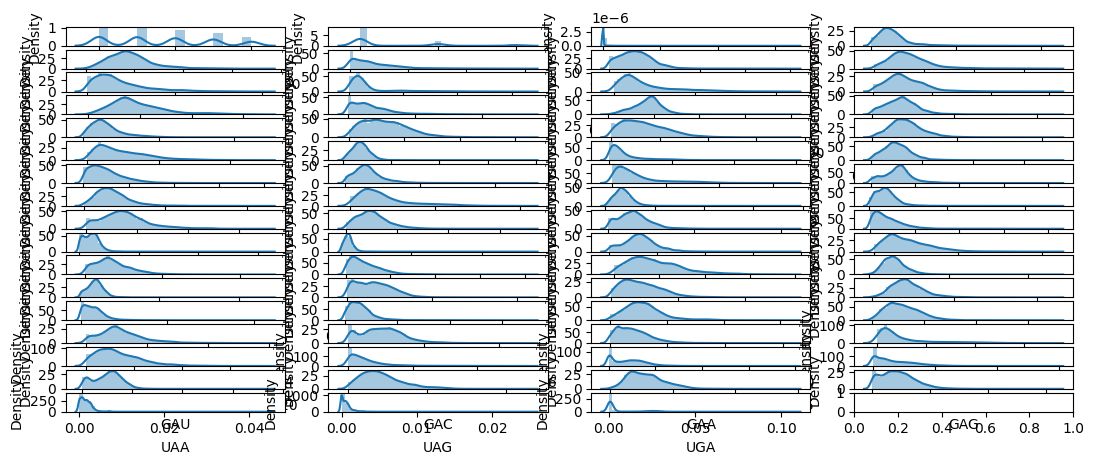

In [19]:
width = 13
height = 5

plt.style.use("default")

figure, axes = plt.subplots(nrows=17, ncols=4, figsize=(width, height))

for column, axe in zip(dataset, axes.flatten()):
    sns.distplot(dataset[column], ax=axe)#
    
plt.tight_layout()

In [20]:
x = dataset.drop(["Kingdom","DNAtype"], axis=1)#,"_varianceCI12", "_varianceRE12"

y1 = dataset["Kingdom"]
y2 = dataset["DNAtype"]

In [21]:
from sklearn.preprocessing import scale
X = scale(x) #numpy array

In [22]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.2, random_state=42)

Cumulative Variances (Percentage):
[30.66507174 46.71579664 52.50326735 56.55938378 59.98272394 63.05763834
 65.48709461 67.44559784 69.25409158 70.9344613  72.46946923 73.95823851
 75.32164984 76.63651082 77.91097117 79.147724   80.28492996 81.38223791
 82.416684   83.39107571 84.25078177 85.06305825 85.82390071 86.53495168
 87.23000426 87.86310913 88.47174374 89.0561826  89.61436143 90.16526638
 90.6900047  91.19023393 91.6793454  92.14196403 92.56914813 92.98723534
 93.37487711 93.75485888 94.12997913 94.49453343 94.84866539 95.18017885]
Number of components: 42


Text(0, 0.5, 'Explained variance (%)')

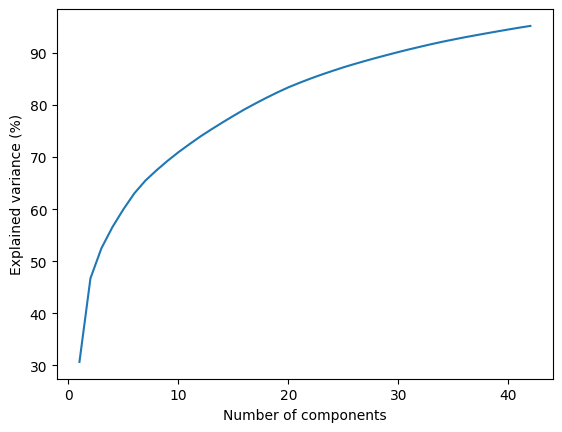

In [23]:
pca = PCA(n_components=0.95)
X_vis = pca.fit_transform(X)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')
# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [24]:
x_train_pca1 = pca.transform(x_train1)
x_test_pca1 = pca.transform(x_test1)

In [25]:
#param_grid = dict(n_estimators=3**np.arange(1, 5),
#                  max_features=["auto","sqrt","log2"])
param_grid = dict(learning_rate=np.arange(10,30,10)/100, #[0.01,0.03]
                  max_depth=[6,7])
                #  n_estimators=[100])
classifier = xgb.XGBClassifier( objective="multi:softmax",booster= "gbtree",seed=7, num_class= 5, random_state=42)
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits) 
grid = GridSearchCV(classifier,param_grid=param_grid,cv=cv)
grid.fit(x_train_pca1, y_train1)
model = grid.best_estimator_
model.fit(x_train_pca1, y_train1)

XGBClassifier(learning_rate=0.2, max_depth=6, num_class=5,
              objective='multi:softprob', random_state=42, seed=7)

In [26]:
grid.best_params_

{'learning_rate': 0.2, 'max_depth': 6}

In [27]:
model.score(x_train_pca1, y_train1)#Score del entrenamiento

1.0

In [28]:
#Predicting the test set
yp = model.predict(x_test_pca1 )

In [40]:
from sklearn.metrics import confusion_matrix, mean_squared_error,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,RocCurveDisplay
roc_auc_score(y_test1,model.predict_proba(x_test_pca1),multi_class='ovo')

0.9942249058944638

In [30]:
def score():
  print(f"Scores:")
  print(f"Train      = {model.score(x_train_pca1, y_train1):.5}")
  print(f"Validation = {model.score(x_test_pca1 , y_test1):.5}")
  #if hasattr(model, "oob_score_"): print(f"OOB        = {model.oob_score_:.5}")
    
score() 

Scores:
Train      = 1.0
Validation = 0.93948


In [32]:
classifier2 = xgb.XGBClassifier( objective="multi:softmax",booster= "gbtree",seed=7, num_class= 5, random_state=42,learning_rate=0.23,max_depth=6)
classifier2.fit(x_train_pca1, y_train1)

XGBClassifier(learning_rate=0.23, max_depth=6, num_class=5,
              objective='multi:softprob', random_state=42, seed=7)

In [36]:
def score():
  print(f"Scores:")
  print(f"Train      = {classifier2.score(x_train_pca1, y_train1):.5}")
  print(f"Validation = {classifier2.score(x_test_pca1 , y_test1):.5}")
score() 

Scores:
Train      = 1.0
Validation = 0.9412


In [44]:
kingdomclas=["bacteria", "virus","plant","vertebrate","invertebrate"]

In [45]:
#Printing Confusion Matrix
cm = pd.DataFrame(confusion_matrix(y_test1, classifier2.predict(x_test_pca1 )), 
                  index = kingdomclas, 
                  columns = kingdomclas)
print('Confusion Matrix:')
print(cm)
print('\n')
print("Reporte de clasificación")
print(classification_report(y_test1, classifier2.predict(x_test_pca1 ),target_names=kingdomclas,digits=4))

Confusion Matrix:
              bacteria  virus  plant  vertebrate  invertebrate
bacteria           568      4      9           0             3
virus                5    561      7           1             6
plant               12     10    449           4            10
vertebrate           1      4      2         406             7
invertebrate         9     14     22           7           209


Reporte de clasificación
              precision    recall  f1-score   support

    bacteria     0.9546    0.9726    0.9635       584
       virus     0.9460    0.9672    0.9565       580
       plant     0.9182    0.9258    0.9220       485
  vertebrate     0.9713    0.9667    0.9690       420
invertebrate     0.8894    0.8008    0.8427       261

    accuracy                         0.9412      2330
   macro avg     0.9359    0.9266    0.9307      2330
weighted avg     0.9406    0.9412    0.9406      2330

